<h1 style="color:tomato;text-align:center;font-size:300%;font-family:verdana;"> Customer Segmentation Excercise</h1>

# ***Nir Molcho***
## **315126912**

## We are an online company and we have dataset containing online sales.<br> We want to segment our customers to groups to give them targeted commercials.<br> Your job is to find the best customer segmentation.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, date

### Import the data and print the head
you might need to use encoding='unicode_escape'

In [2]:
salesdf = pd.read_csv('OnlineRetail.csv', encoding='unicode_escape')
salesdf.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


### Check the shape of the data

In [3]:
salesdf.shape

(541909, 8)

---
# Exploratory Data Analysis

### Check the info

In [4]:
salesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Generate descriptive statistics

In [5]:
salesdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


### How much of the data per feature is null values, percentage-wise
Expected Answer:<br>
InvoiceNo       0.000000<br>
StockCode       0.000000<br>
Description     0.268311<br>
Quantity        0.000000<br>
InvoiceDate     0.000000<br>
UnitPrice       0.000000<br>
CustomerID     24.926694<br>
Country         0.000000

In [6]:
salesdf.isnull().sum()/len(salesdf)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

___
# Feature Engineering

### Drop the null values

In [7]:
salesdf.dropna(inplace=True)

### Check again the shape of the data

In [8]:
salesdf.shape

(406829, 8)

### Change the customer id feature to a string type

In [9]:
salesdf['CustomerID'] = salesdf['CustomerID'].astype('int64').astype('str')

### Change the invoice date to a datetime type
use format='%d-%m-%Y %H:%M'

In [10]:
salesdf['InvoiceDate'] = pd.to_datetime(salesdf['InvoiceDate'], format='%d-%m-%Y %H:%M')

### Create a feature of the total amount spent
quantity * unit price

In [11]:
salesdf['Total_Amount_Spent'] = salesdf['Quantity'] * salesdf['UnitPrice']

### Check the head of the data

In [12]:
salesdf.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount_Spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


### Sum the total amount spent per customer id to a new data frame and print the head
the new data frame should contain only customer id and sum of total amount spent

In [13]:
customer_spending = salesdf.groupby('CustomerID')['Total_Amount_Spent'].sum().reset_index()
customer_spending.head()

,CustomerID,Total_Amount_Spent
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


### Count the invoice numbers per customer id to a new data frame and print the head

In [14]:
customer_invoices = salesdf.groupby('CustomerID')['InvoiceNo'].count().reset_index()

###  Find how many days have passed between each customer's transaction and the last transaction of the company - make a new data frame containing each customer's last transaction (min) and print the head
Customer ID and Time passed from last transaction

In [15]:
last_transaction = salesdf.groupby('CustomerID')['InvoiceDate'].min().reset_index()

### Merge the total amount spent data frame and the invoice number data frame


In [16]:
mergedf = pd.merge(customer_spending, customer_invoices, on='CustomerID')
mergedf

,CustomerID,Total_Amount_Spent,InvoiceNo
0,12346,0.00,2
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17
...,...,...,...
4367,18280,180.60,10
4368,18281,80.82,7
4369,18282,176.60,13
4370,18283,2094.88,756


### Merge the above data frame and the last transaction data frame


In [17]:
mergedf = pd.merge(mergedf, last_transaction, on='CustomerID')

### Change the last transaction column to show only the days
use datetime's days method

In [18]:
mergedf

,CustomerID,Total_Amount_Spent,InvoiceNo,InvoiceDate
0,12346,0.00,2,2011-01-18 10:01:00
1,12347,4310.00,182,2010-12-07 14:57:00
2,12348,1797.24,31,2010-12-16 19:09:00
3,12349,1757.55,73,2011-11-21 09:51:00
4,12350,334.40,17,2011-02-02 16:01:00
...,...,...,...,...
4367,18280,180.60,10,2011-03-07 09:52:00
4368,18281,80.82,7,2011-06-12 10:53:00
4369,18282,176.60,13,2011-08-05 13:35:00
4370,18283,2094.88,756,2011-01-06 14:14:00


In [19]:
mergedf['InvoiceDate'] = mergedf['InvoiceDate'].apply(lambda x: datetime.strftime(x, '%d'))

### Make sure the features names are: CustomerID, Total_Amount_Spent, Count_invoice, Last_transaction

In [20]:
mergedf.columns = ['CustomerID', 'Total_Amount_Spent', 'Count_invoice', 'Last_transaction']

### Check the shape of the new data frame
<u><b>from now on any mention of data frame refers to the new data frame</b></u>

In [21]:
mergedf.shape

(4372, 4)

### Drop the customer id column

In [22]:
mergedf.drop('CustomerID', axis=1, inplace=True)

___
# Segmentation

### Create a new data frame containing the indices 1, 4302, 2438, 261 and display the data frame

In [23]:
indices = [1, 4302, 2438, 261]
samples=pd.DataFrame(mergedf.loc[indices],columns=mergedf.keys())
display(samples)

,Total_Amount_Spent,Count_invoice,Last_transaction
1,4310.00,182,07
4302,212.96,18,08
2438,12433.34,495,02
261,3817.08,232,01


### Display a heatmap of the indices data frame percentiles
print the annotations

,Total_Amount_Spent,Count_invoice,Last_transaction
1,92.7,88.0,26.7
4302,17.6,26.0,31.2
2438,98.5,98.0,7.1
261,91.3,91.4,2.4


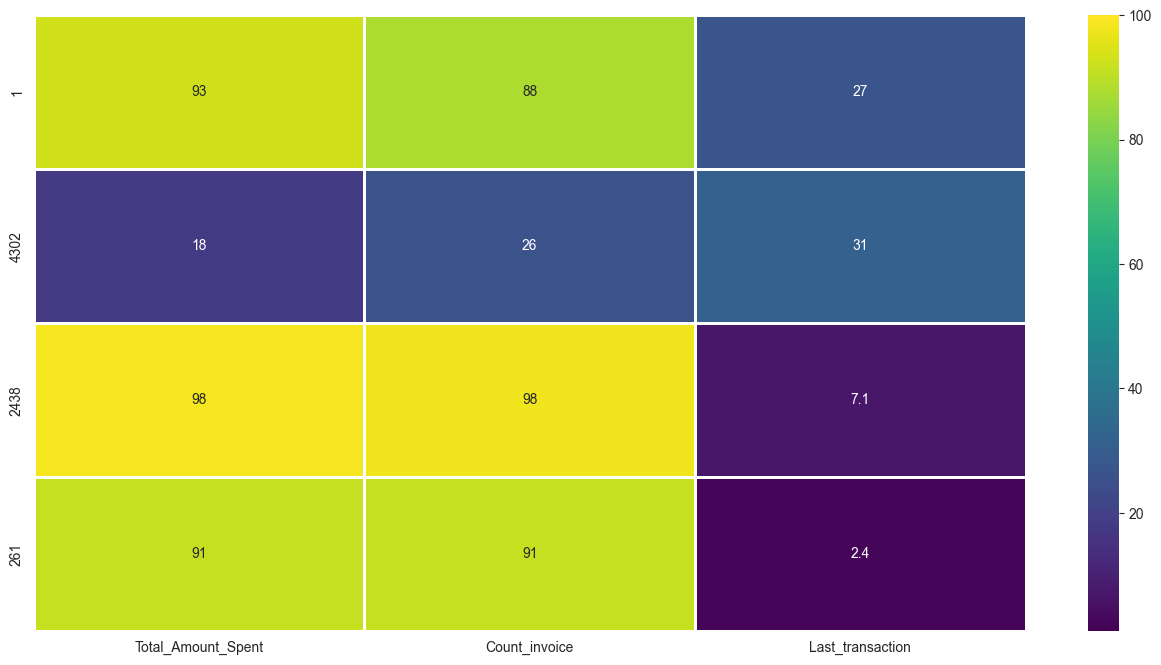

In [24]:
import seaborn as sns
percentiles=mergedf.rank(pct=True)
percentiles=(percentiles*100).apply(lambda x:np.round(x,decimals=1))
percentiles.head()
percentiles=percentiles.loc[indices]
plt.figure(figsize=(16,8))
sns.heatmap(percentiles,vmin=1,vmax=100,annot=True,cmap='viridis',
           linecolor='white',linewidths=1)
display(percentiles)

### Import train_test_split, DecisionTreeRegressor, r2_score if you haven't done this already

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

### What are the data frames keys?

In [26]:
mergedf.keys()

Index(['Total_Amount_Spent', 'Count_invoice', 'Last_transaction'], dtype='object')

### Check the r^2 score using decision tree regressor for each feature with the other features
make each feature a traget and split to training set and test set and check the r2 score

In [27]:
for feature in mergedf.keys():
    X = mergedf.drop(feature, axis=1)
    y = mergedf[feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    dtree = DecisionTreeRegressor()
    dtree.fit(X_train, y_train)
    predictions = dtree.predict(X_test)
    print(f'Feature: {feature}')
    print(f'r2 score: {r2_score(y_test, predictions)}')
    print('\n')

Feature: Total_Amount_Spent
r2 score: 0.04133445983422113


Feature: Count_invoice
r2 score: -0.6988370288774379


Feature: Last_transaction
r2 score: -1.0128808086660532




#### Are there any perfect predictors?

no

### Print a boxplot to check for outliers

In [28]:
mergedf['Last_transaction'] = mergedf['Last_transaction'].astype(int)

<Axes: >

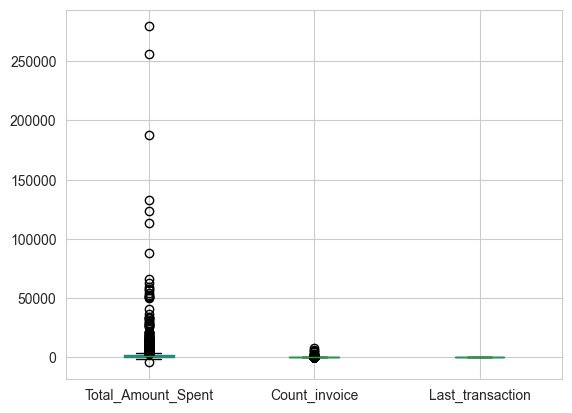

In [29]:
mergedf.boxplot()

### Use Tukey's rule for finding outliers for each feature

In [30]:
for feature in mergedf.keys():
    q1 = mergedf[feature].quantile(0.25)
    q3 = mergedf[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    print(f'Feature: {feature}')
    print(f'Lower bound: {lower_bound}')
    print(f'Upper bound: {upper_bound}')
    print('\n')

Feature: Total_Amount_Spent
Lower bound: -1684.1812499999999
Upper bound: 3589.2687499999997


Feature: Count_invoice
Lower bound: -110.5
Upper bound: 229.5


Feature: Last_transaction
Lower bound: -14.0
Upper bound: 42.0




### Print the outliers that are repeating on more the one feature

In [31]:
for feature in mergedf.keys():
    q1 = mergedf[feature].quantile(0.25)
    q3 = mergedf[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = mergedf[(mergedf[feature] < lower_bound) | (mergedf[feature] > upper_bound)]
    print(f'Feature: {feature}')
    print(f'Outliers: {outliers}')
    print('\n')

Feature: Total_Amount_Spent
Outliers:       Total_Amount_Spent  Count_invoice  Last_transaction
1                4310.00            182                 7
10               6207.67            131                 6
12               6245.53            254                12
15               5154.58            274                17
27               4008.62            219                 2
...                  ...            ...               ...
4324             6315.23            299                16
4326             5361.02            286                 3
4327             5192.10            245                 6
4330             7276.90            164                 1
4347             4314.72             16                13

[423 rows x 3 columns]


Feature: Count_invoice
Outliers:       Total_Amount_Spent  Count_invoice  Last_transaction
12               6245.53            254                12
15               5154.58            274                17
55             123725.45         

### How many outliers are there?

In [34]:
def tukey_rule(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = df[(df[feature] > upper_bound) | (df[feature] < lower_bound)]
    return outliers

outlier_counts = {}

for feature in mergedf.keys():
    outliers = tukey_rule(mergedf, feature)
    outlier_counts[feature] = len(outliers)

for feature, count in outlier_counts.items():
    print(f"Number of outliers for '{feature}': {count}")

Number of outliers for 'Total_Amount_Spent': 423
Number of outliers for 'Count_invoice': 380
Number of outliers for 'Last_transaction': 0


### Create a new data frame (final) without the outliers that are repeating more than once

In [35]:
final = mergedf.copy()

### Check the shape of the final data frame

In [36]:
final.shape

(4372, 3)

___
# Clustering

### Use the Elbow Method to choose the number of clusters

In [37]:
from sklearn.cluster import KMeans

### How many clusters does the elbow method suggest is best?

/Users/nirmolcho/Desktop/Task 1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nirmolcho/Desktop/Task 1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nirmolcho/Desktop/Task 1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nirmolcho/Desktop/Task 1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

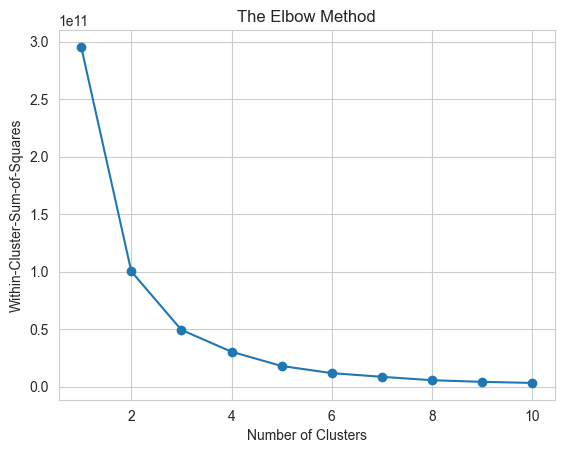

In [38]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    kmeans.fit(final)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares");

### Use Dendrogram to choose the number of clusters

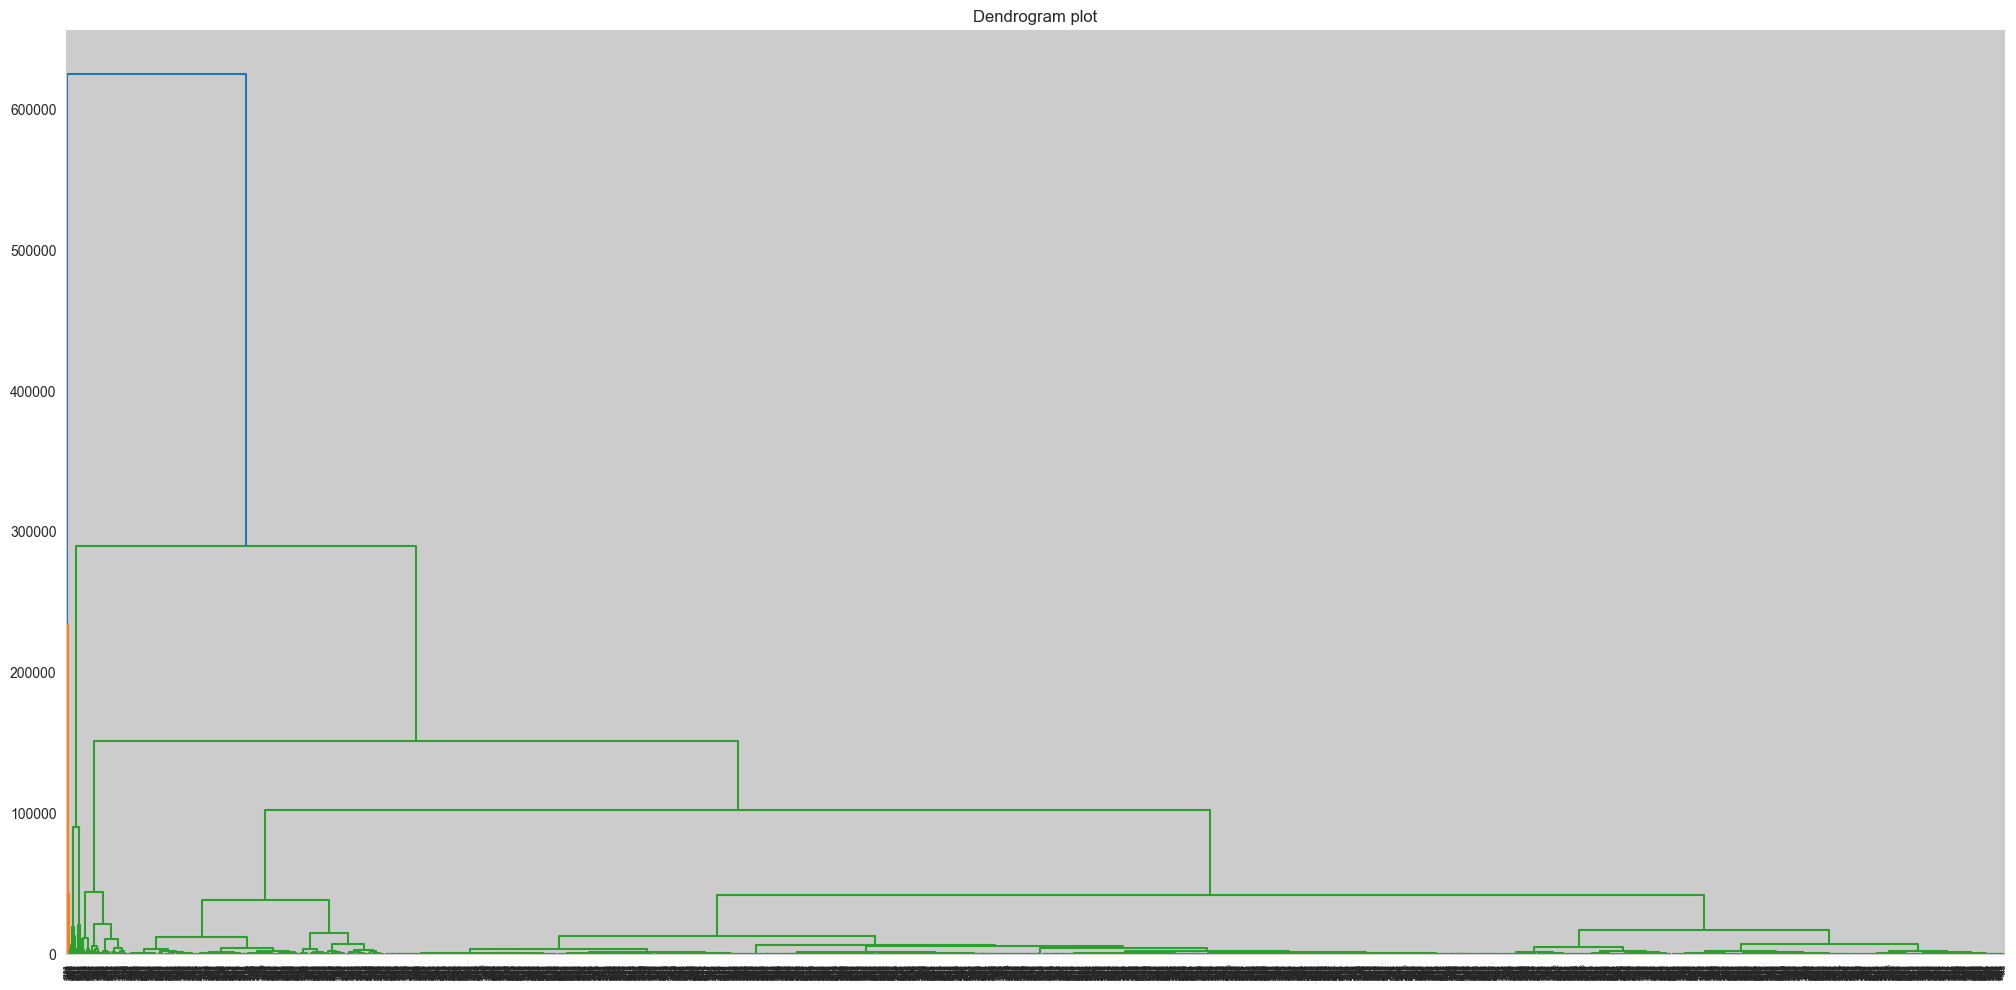

In [39]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(25,12))
dendrogram=sch.dendrogram(sch.linkage(final,method = 'ward'))
plt.title('Dendrogram plot')
plt.show()

### How many clusters does the dendrogram suggest is best?

In [40]:
4

4

___
# Apply to data

In [41]:
from sklearn.metrics import silhouette_score

### Instantiate the KMeans model with the number of clusters you found, fit and predict

In [48]:
x = final.values
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(x)

/Users/nirmolcho/Desktop/Task 1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### What are the cluster's centers?

In [49]:
kmeans.cluster_centers_

array([[1.13343138e+03, 7.65244392e+01, 1.40278630e+01],
       [2.41136560e+05, 9.56333333e+02, 1.13333333e+01],
       [7.14235160e+04, 1.51060000e+03, 7.13333333e+00],
       [1.43295926e+04, 4.80840336e+02, 8.63025210e+00]])

### Check the silhouette score of the kmeans algorithm

In [50]:
silhouette_score(x,y_kmeans)

0.8784588150953023

### Create a new column for the final data frame that contains the predictions

In [51]:
final['Clusters'] = y_kmeans

### Print the head of the final data frame

In [52]:
final.head()

,Total_Amount_Spent,Count_invoice,Last_transaction,Clusters
0,0.00,2,18,0
1,4310.00,182,7,0
2,1797.24,31,16,0
3,1757.55,73,21,0
4,334.40,17,2,0


### Print a scatterplot of the total amount spent against the last invoice based off of the clusters prediction
use palette = 'icefire'

<Axes: xlabel='Total_Amount_Spent', ylabel='Count_invoice'>

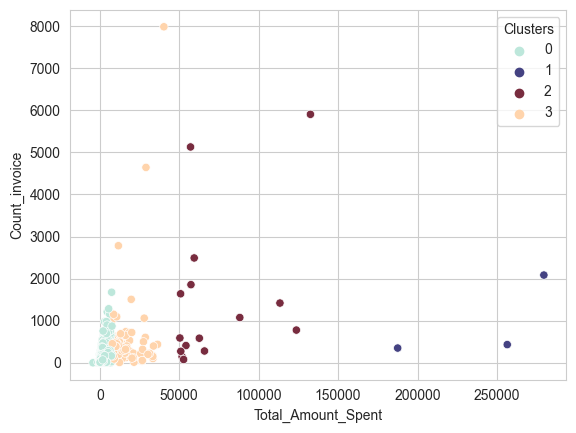

In [61]:
sns.scatterplot(x='Total_Amount_Spent',y='Count_invoice',data=final,hue='Clusters',palette='icefire')

### Print a scatterplot of the total amount spent against the last transaction based off of the clusters prediction
use palette = 'icefire'

<Axes: xlabel='Total_Amount_Spent', ylabel='Last_transaction'>

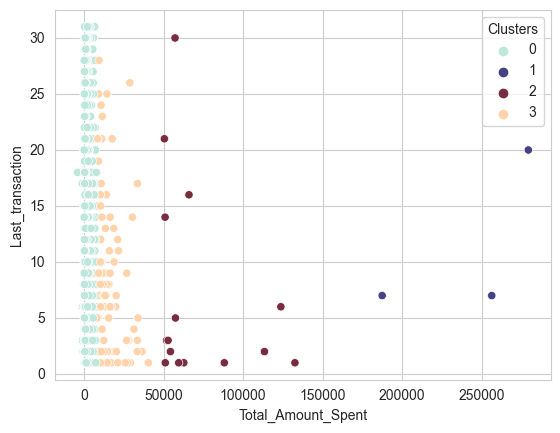

In [62]:
sns.scatterplot(x='Total_Amount_Spent',y='Last_transaction',data=final,hue='Clusters',palette='icefire')

### Print a scatterplot of the last transaction against the last invoice based off of the clusters prediction
use palette = 'icefire'

<Axes: xlabel='Last_transaction', ylabel='Last_transaction'>

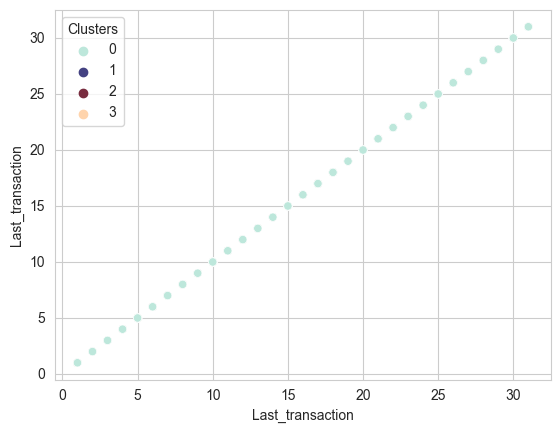

In [63]:
sns.scatterplot(x='Last_transaction',y='Last_transaction',data=final,hue='Clusters',palette='icefire')

### Print a 3D plot of the three features based off of the clusters prediction
use palette = 'icefire'

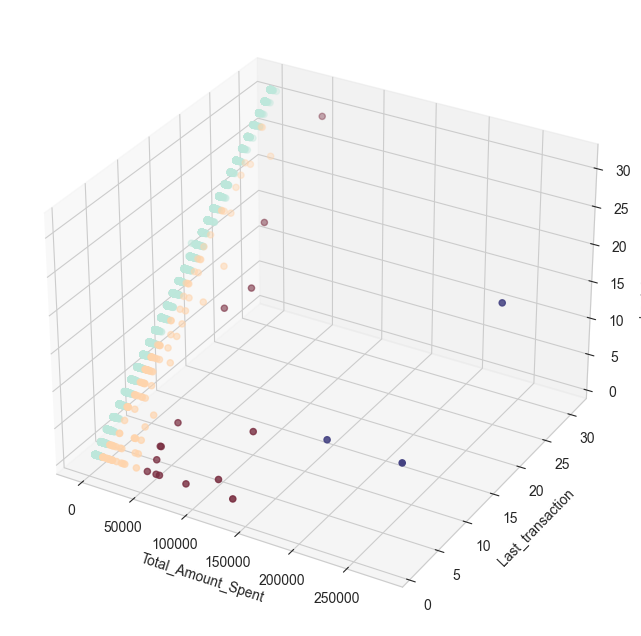

In [64]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(final['Total_Amount_Spent'],final['Last_transaction'],final['Last_transaction'],c=final['Clusters'],cmap='icefire')
ax.set_xlabel('Total_Amount_Spent')
ax.set_ylabel('Last_transaction')
ax.set_zlabel('Last_transaction')
plt.show()

___
# GOOD LUCK !!